In [1]:
import os, shutil

In [2]:
original_dataset_dir = 'C:/Users/Zeeshan/Desktop/kaggle_original_data'

In [3]:
base_dir = 'E:/working_directory'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
print('total training cat image:', len(os.listdir(train_cats_dir)))
print('total training dog image:', len(os.listdir(train_dogs_dir)))
print('total validation cat image:', len(os.listdir(validation_cats_dir)))
print('total validation dog image:', len(os.listdir(validation_dogs_dir)))
print('total test cat image:', len(os.listdir(test_cats_dir)))
print('total test dog image:', len(os.listdir(test_dogs_dir)))

total training cat image: 1000
total training dog image: 1000
total validation cat image: 500
total validation dog image: 500
total test cat image: 500
total test dog image: 500


In [18]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3, 3,), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [20]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./ 255)
test_datagen = ImageDataGenerator(rescale=1./ 255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:' , data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


In [23]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs = 30, 
                              validation_data = validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 333s 3s/step - loss: 0.6918 - acc: 0.5285 - val_loss: 0.6901 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 327s 3s/step - loss: 0.6655 - acc: 0.5995 - val_loss: 0.6376 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 328s 3s/step - loss: 0.6101 - acc: 0.6755 - val_loss: 0.6484 - val_acc: 0.6110
Epoch 4/30
100/100 [==============================] - 327s 3s/step - loss: 0.5658 - acc: 0.7075 - val_loss: 0.6001 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 326s 3s/step - loss: 0.5311 - acc: 0.7340 - val_loss: 0.5881 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 332s 3s/step - loss: 0.5014 - acc: 0.7430 - val_loss: 0.5900 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 400s 4s/step - loss: 0.4775 - acc: 0.7700 - val_loss: 0.5793 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 447s 4s/step - 

In [24]:
model.save("working_directory_2.h5")

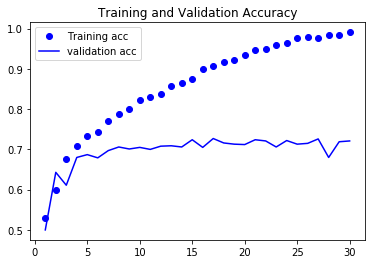

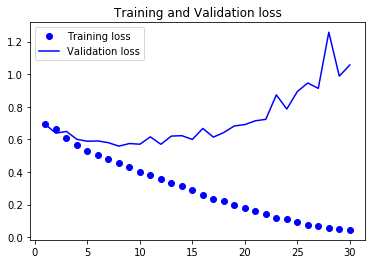

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label= 'validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss' )
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [27]:
datagen=ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

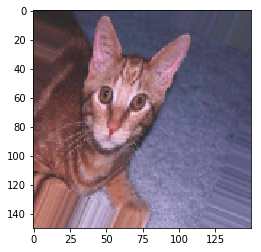

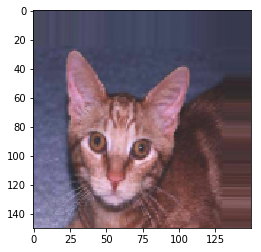

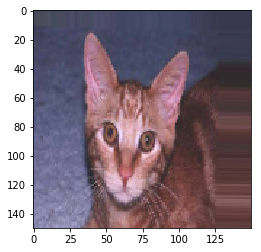

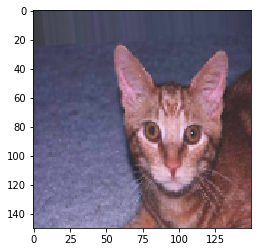

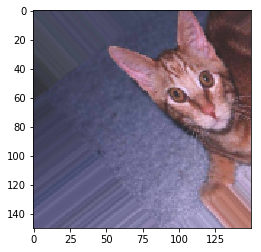

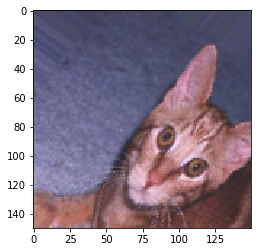

In [36]:
from tensorflow.keras.preprocessing import image

fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[10]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%6==0:
        break
plt.show()

In [37]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [38]:
train_datagen=ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')
validation_generator=test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')
history=model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 357s 4s/step - loss: 0.6946 - acc: 0.5115 - val_loss: 0.6866 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 356s 4s/step - loss: 0.6831 - acc: 0.5520 - val_loss: 0.6656 - val_acc: 0.5870
Epoch 3/30
100/100 [==============================] - 357s 4s/step - loss: 0.6730 - acc: 0.5860 - val_loss: 0.6534 - val_acc: 0.5980
Epoch 4/30
100/100 [==============================] - 355s 4s/step - loss: 0.6595 - acc: 0.5985 - val_loss: 0.7549 - val_acc: 0.5090
Epoch 5/30
100/100 [==============================] - 357s 4s/step - loss: 0.6505 - acc: 0.6080 - val_loss: 0.6384 - val_acc: 0.6170
Epoch 6/30
100/100 [==============================] - 363s 4s/step - loss: 0.6348 - acc: 0.6335 - val_loss: 0.6070 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 358s 4s/step - loss: 0.6221 - acc: 0.6400 - val_loss: 0.6495 - v

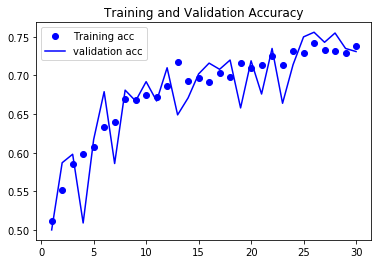

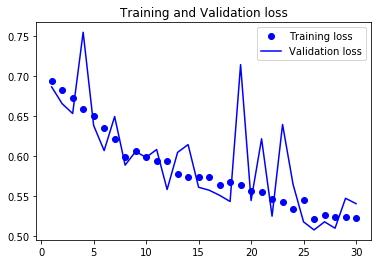

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label= 'validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss' )
plt.title('Training and Validation loss')
plt.legend()

plt.show()